# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [2]:
df = pd.read_csv(r'/kaggle/input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses **(measured in tens of thousands of US Dollars)**
9. medianHouseValue: Median house value for households within a block **(measured in US Dollars)**
10. oceanProximity: Location of the house w.r.t ocean/sea

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()
# Values are repetitve so it's probably a categorical attribute.

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

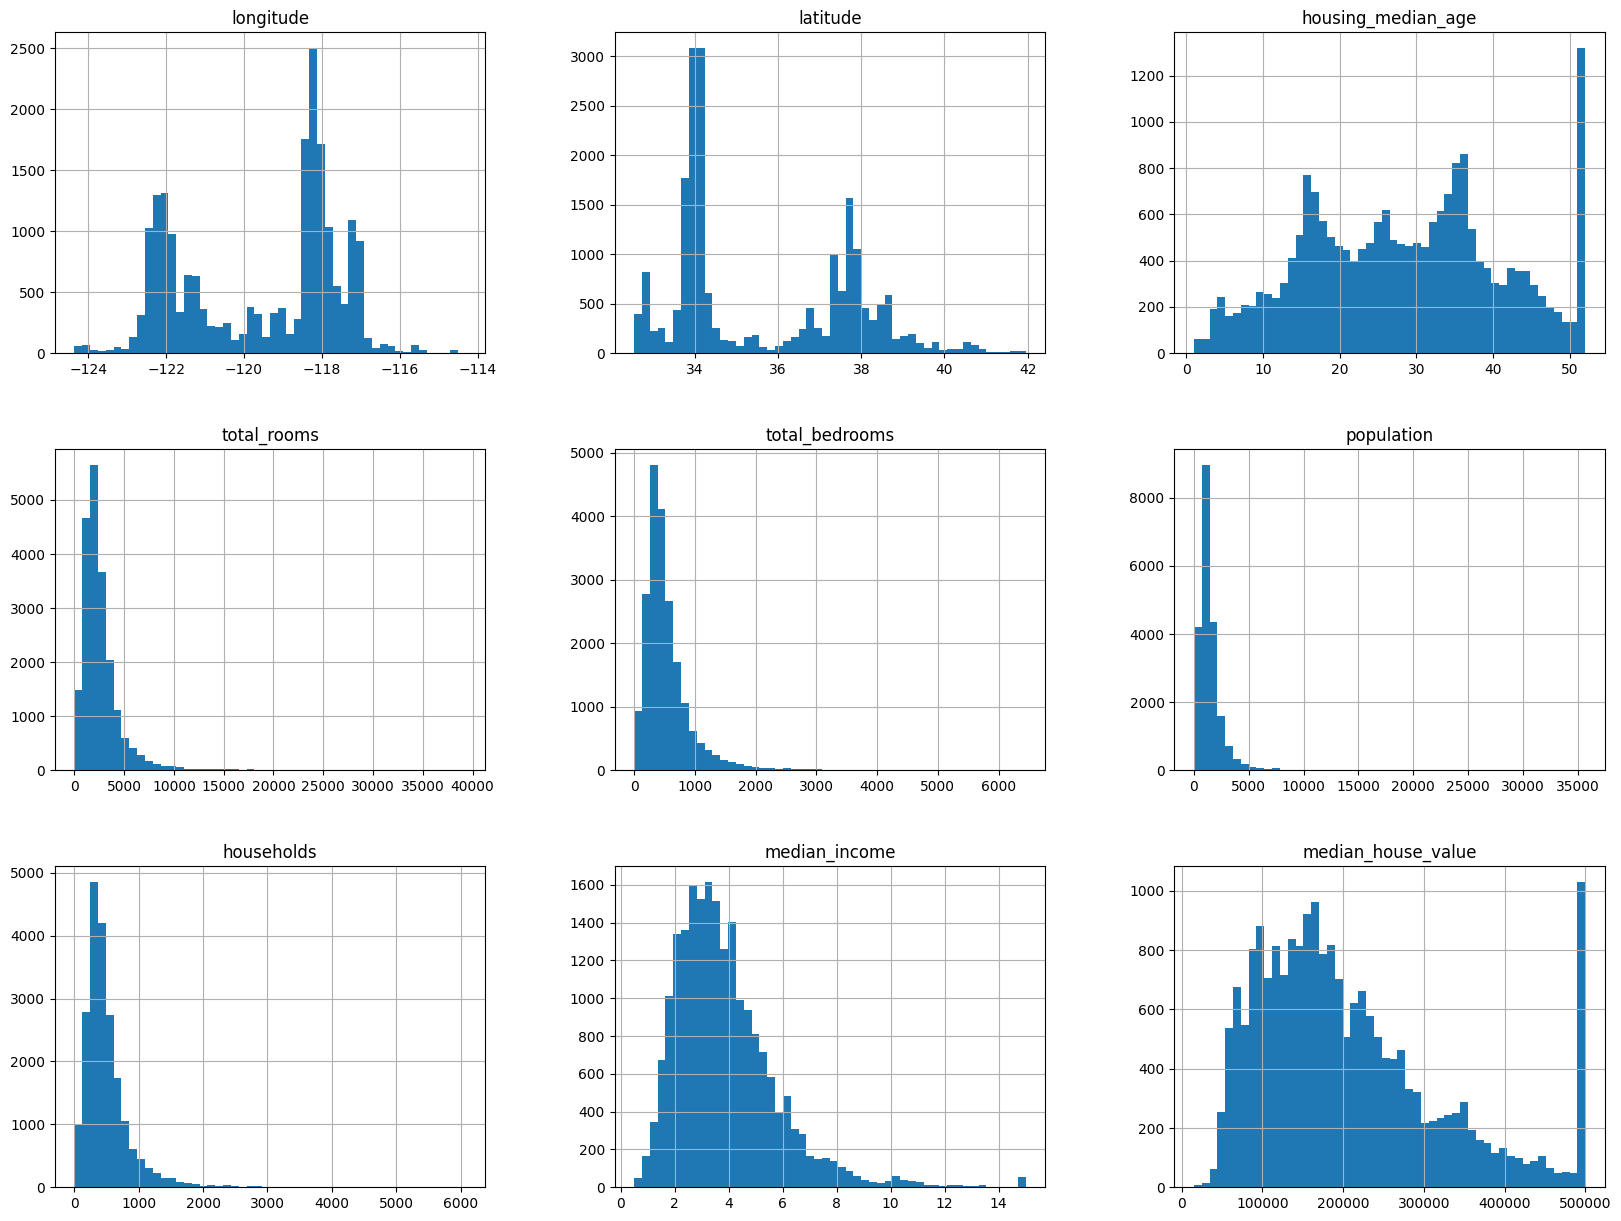

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

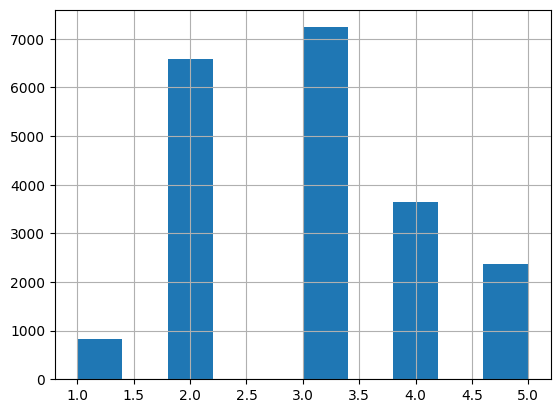

In [8]:
df['income_category']=pd.cut(df['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
df['income_category'].hist()

In [9]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.2, stratify=df['income_category'], random_state=42)

In [10]:
train.drop(columns='income_category', inplace=True)
test.drop(columns='income_category', inplace=True)

In [11]:
train_copy=train.copy()

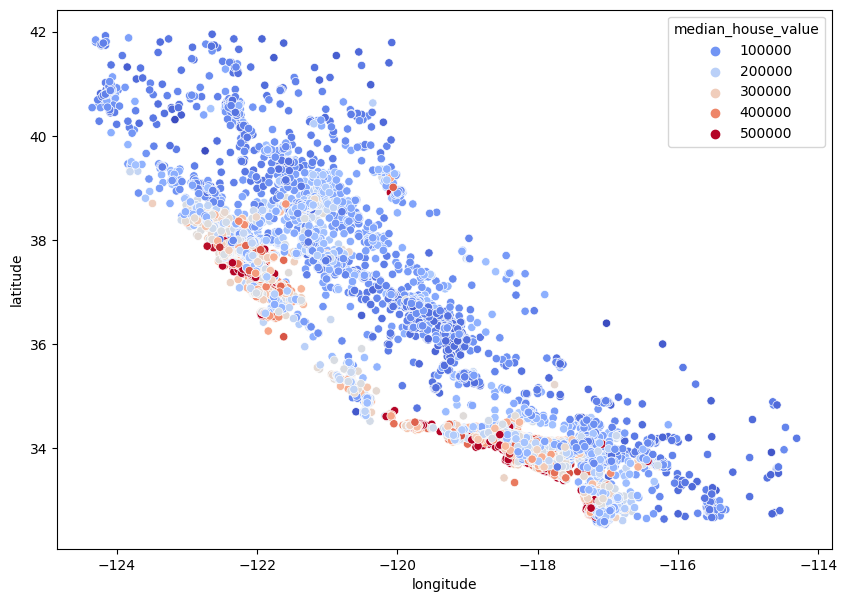

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=train_copy, x="longitude", y="latitude", hue='median_house_value', palette='coolwarm')
plt.show()

<Axes: >

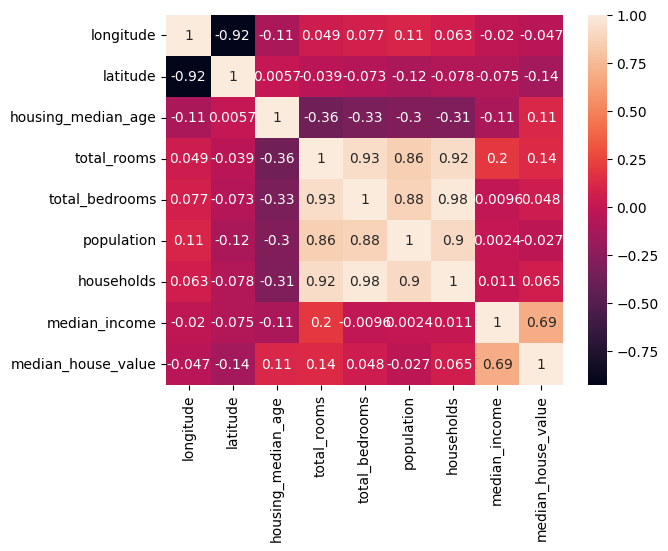

In [13]:
corr_matrix=train_copy.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

In [14]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

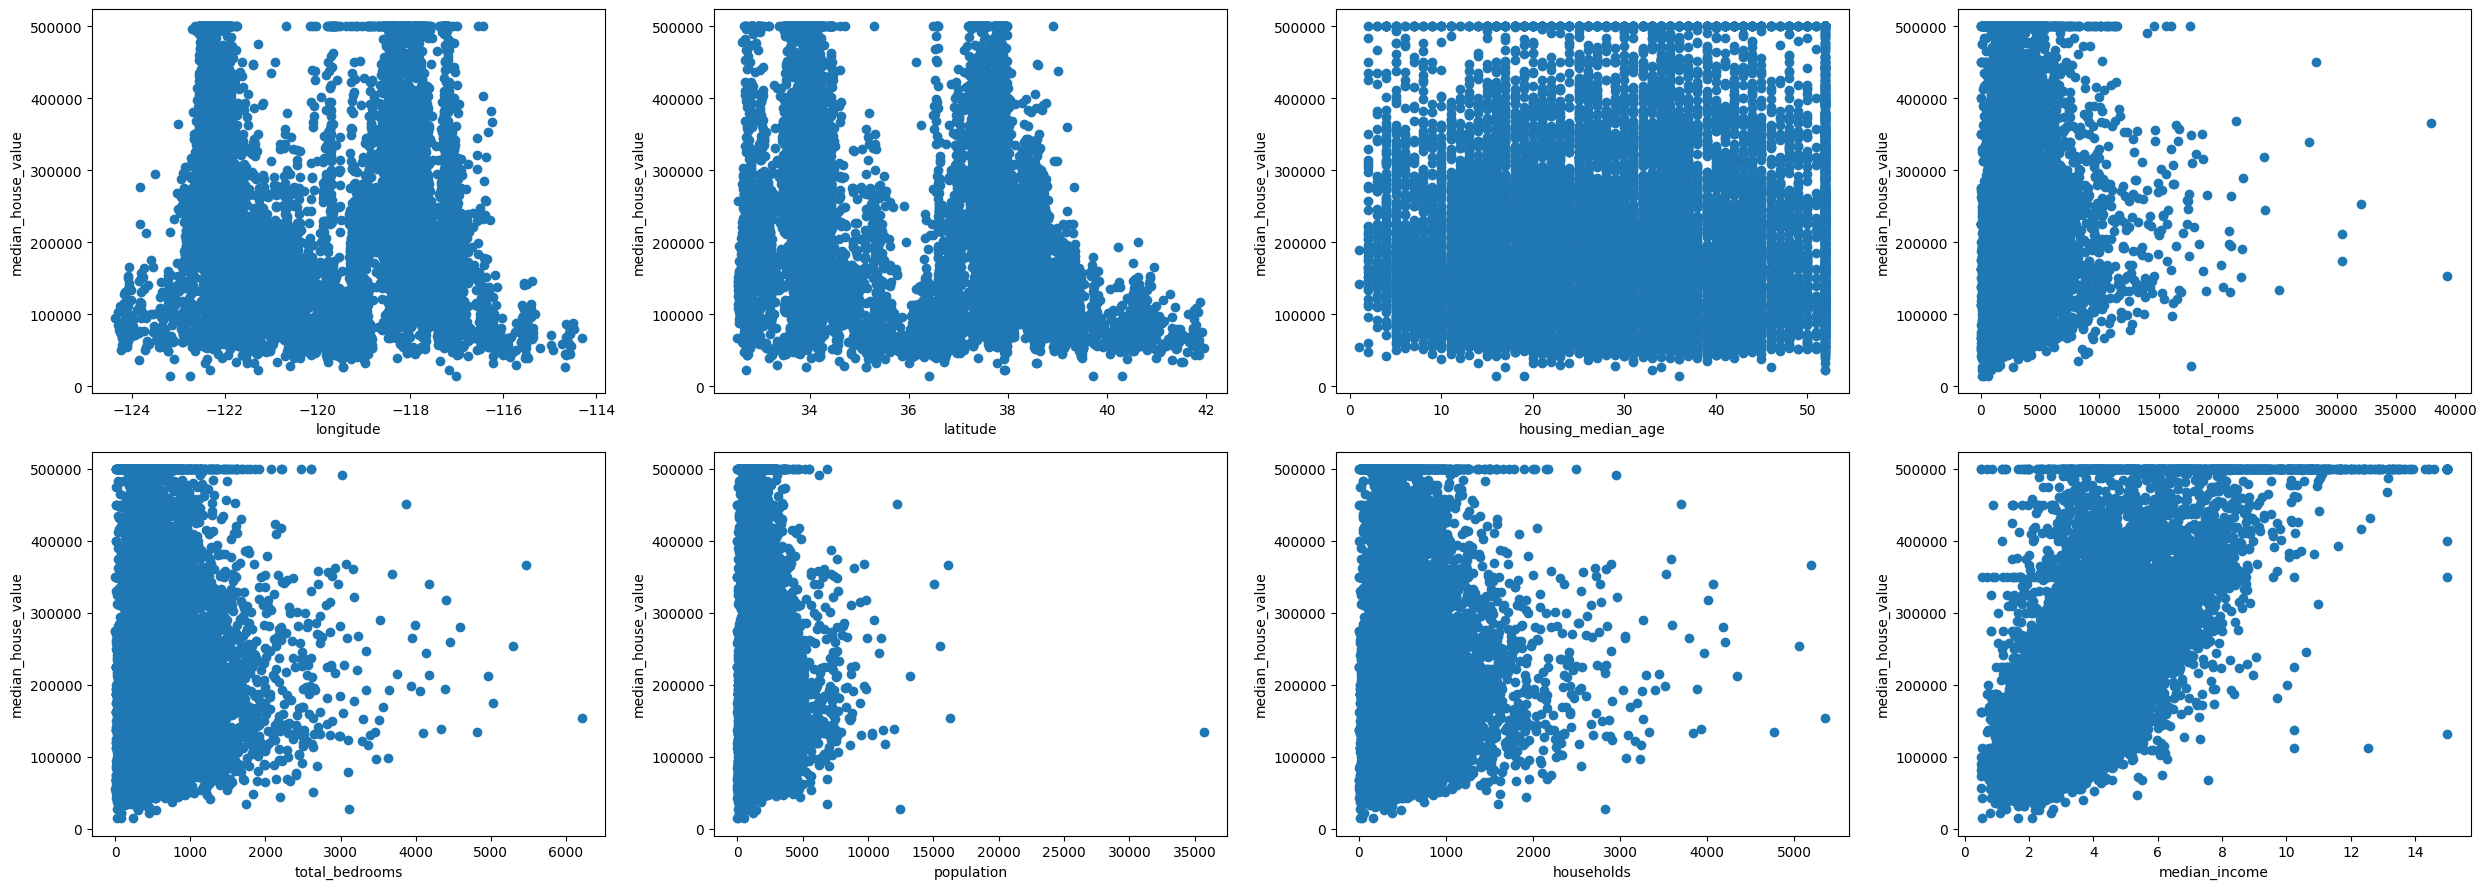

In [15]:
numeric_columns = train_copy.select_dtypes(include=['int64', 'float64'])
numeric_columns.drop(columns='median_house_value', inplace=True)
fig, axs = plt.subplots(2, 4, figsize=(25, 9))
i=0
j=0
for row, col in enumerate(numeric_columns.columns):
    axs[i, j].scatter(train_copy[col], train_copy['median_house_value'])
    axs[i, j].set_xlabel(col)
    axs[i, j].set_ylabel('median_house_value')
    j+=1
    if j==4:
        j=0
        i=1

plt.tight_layout()
plt.show()
# from the previous we can see that the most promosing attribute to predict the median house value is the median income

In [16]:
train_copy["rooms_per_household"] = train_copy["total_rooms"]/train_copy["households"]
train_copy["bedrooms_per_room"] = train_copy["total_bedrooms"]/train_copy["total_rooms"]
train_copy["population_per_household"]=train_copy["population"]/train_copy["households"]

In [17]:
corr_matrix=train_copy.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)
# bedrooms_per_room is more correlated to median_house_value than total_room and total_bedrooms
# rooms_per_household is more correlated to median_house_value than total_room and households

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

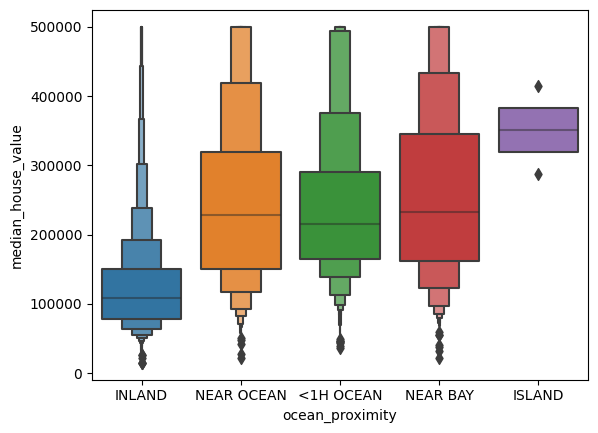

In [18]:
sns.boxenplot(data=train_copy, y='median_house_value', x='ocean_proximity')

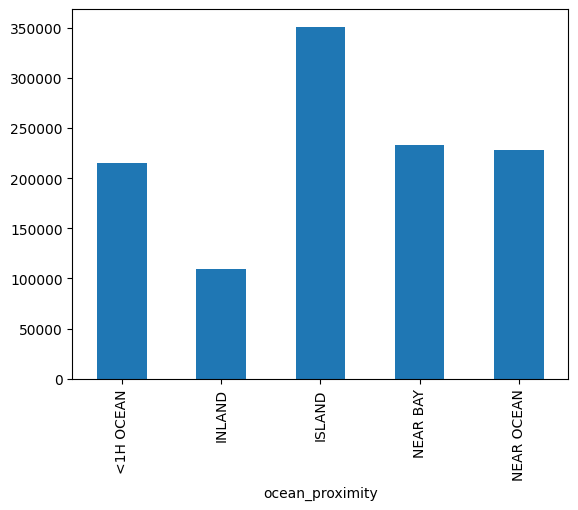

In [19]:
tmp = train_copy.groupby('ocean_proximity')['median_house_value'].median()
tmp.plot.bar()
plt.show()

# Data cleaning and preprocessing

In [20]:
copy_train=train.copy()
X_train=copy_train.drop(columns='median_house_value')
y_train=copy_train['median_house_value'].copy()

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_household = add_rooms_per_household
        self.add_population_per_household = add_population_per_household
    def fit(self, X, y=None):
        return self
    def transform(self,X, y=None):
        if self.add_bedrooms_per_room==1:
            bedrooms_per_room=X[:, bedrooms_ix] / X[:, rooms_ix]
            bedrooms_per_room=np.log(bedrooms_per_room+1)
            X=np.c_[X, bedrooms_per_room]
        if self.add_rooms_per_household==1:
            rooms_per_household=X[:, rooms_ix] / X[:, households_ix]
            rooms_per_household=np.log(rooms_per_household+1)
            X=np.c_[X, rooms_per_household]
        if self.add_population_per_household==1:
            population_per_household=X[:, population_ix] / X[:, households_ix]
            population_per_household=np.log(population_per_household+1)
            X=np.c_[X, population_per_household]
            X[rooms_ix]=np.log(X[rooms_ix]+1)
            X[bedrooms_ix]=np.log(X[bedrooms_ix]+1)
            X[population_ix]=np.log(X[population_ix]+1)
            X[households_ix]=np.log(X[households_ix]+1)
        return X

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributeAdder(add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=False)),
    ('std_scaler', StandardScaler()),
])

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_attribs = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs=['ocean_proximity']
full_pipline=ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
processed_X_train=full_pipline.fit_transform(X_train)

# Machine learning regression models

In [24]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(processed_X_train, y_train)

LinearRegression()

In [25]:
predictions=reg.predict(processed_X_train)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
error=mean_squared_error(y_train, predictions)
error=np.sqrt(error)
error

68535.1932648052

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()

tree_reg.fit(processed_X_train, y_train)

DecisionTreeRegressor()

In [28]:
tree_predictions=tree_reg.predict(processed_X_train)
tree_error=mean_squared_error(y_train, tree_predictions)
tree_error

0.0

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, processed_X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rsme_scores=np.sqrt(-scores)
tree_rsme_scores.mean()

69994.08195184876

In [30]:
lin_reg_scores=cross_val_score(reg, processed_X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores=np.sqrt(-lin_reg_scores)
lin_rmse_scores.mean()

68847.73528687087

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(processed_X_train, y_train)
forest_reg_scores=cross_val_score(forest_reg, processed_X_train, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse=np.sqrt(-forest_reg_scores.mean())
forest_rmse

49724.570299042425

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]
grid_search=GridSearchCV(
    forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True
)
grid_search.fit(processed_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [34]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [35]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_score), params)

65067.15528233464 {'max_features': 2, 'n_estimators': 3}
57050.83034073234 {'max_features': 2, 'n_estimators': 10}
54177.69398102191 {'max_features': 2, 'n_estimators': 30}
62594.87420983534 {'max_features': 4, 'n_estimators': 3}
53789.84722517136 {'max_features': 4, 'n_estimators': 10}
51779.55282903342 {'max_features': 4, 'n_estimators': 30}
59976.56706775815 {'max_features': 6, 'n_estimators': 3}
53726.21626746705 {'max_features': 6, 'n_estimators': 10}
50841.50934956144 {'max_features': 6, 'n_estimators': 30}
61248.71967520439 {'max_features': 8, 'n_estimators': 3}
52890.59568836955 {'max_features': 8, 'n_estimators': 10}
50776.928760544826 {'max_features': 8, 'n_estimators': 30}
63974.64645695751 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55780.77214528688 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61282.466068288464 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53328.547159191985 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [36]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37696111790530934, 'median_income'),
 (0.15633701521958585, '<1H OCEAN'),
 (0.09730547406416494, 'longitude'),
 (0.08245557582317718, 'latitude'),
 (0.07671820556033625, 'rooms_per_hhold'),
 (0.04787939775439716, 'housing_median_age'),
 (0.04773595573199933, 'pop_per_hhold'),
 (0.030616880949751707, 'population'),
 (0.023209556948270368, 'total_bedrooms'),
 (0.020926005332700337, 'total_rooms'),
 (0.02066287099164892, 'households'),
 (0.009633037348834089, 'bedrooms_per_room'),
 (0.007130910452382665, 'NEAR BAY'),
 (0.0022900946249900154, 'ISLAND'),
 (0.00013790129245189637, 'INLAND')]

In [37]:
final_model=grid_search.best_estimator_
X_test=test.drop(columns='median_house_value')
y_test=test['median_house_value']
processed_X_test=full_pipline.transform(X_test)
final_predictions=final_model.predict(processed_X_test)
final_mse=mean_squared_error(y_test, final_predictions)
final_mse=np.sqrt(final_mse)
final_mse

48911.850679187984